This Notebook/demo uses spike interface, [here is how to install Spike Interface](https://spikeinterface.readthedocs.io/en/latest/installation.html)

In [1]:
import os
os.chdir(r"Q:/sachuriga/Sachuriga_Python/quattrocolo-nwb4fp/src")

import sys
from pathlib import Path

import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import UnitMatchPy.extract_raw_data as erd
import numpy as np 
import probeinterface as pi
import spikeinterface.exporters as sex
from spikeinterface.preprocessing import (bandpass_filter,
                                           common_reference,
                                           whiten)
from spikeinterface.extractors.neoextractors.openephys import OpenEphysBinaryRecordingExtractor
import os
import glob

from nwb4fp.CR_CA1_paper.Unit_match.unit_match_files import load_filen ,run_unitmatch

c:\Users\sachur\AppData\Local\anaconda3\envs\nwb4fp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sachur\AppData\Local\anaconda3\envs\nwb4fp\Lib\site-packages\UnitMatchPy\GUI.py:1271: SyntaxWarning: invalid escape sequence '\m'
  main_ax.set_xlabel('Xpos ($\mu$m)', size = 14)
c:\Users\sachur\AppData\Local\anaconda3\envs\nwb4fp\Lib\site-packages\UnitMatchPy\GUI.py:1272: SyntaxWarning: invalid escape sequence '\m'
  main_ax.set_ylabel('Ypos ($\mu$m)', size = 14)


In [2]:
# Set the base path
ephys_path = r'S:/Sachuriga/Ephys_Recording/CR_CA1'

# Find all folders ending with "_phy_k_manual"
pattern = rf'{ephys_path}/*/*_phy_k_manual'
phy_folders = glob.glob(pattern)

valid_animals = ["65165", "65091", "63383", "63385", "65588", "66537", "66538", "66539", "66922", "65622"]
#valid_animals = ["66537", "66538", "66539", "66922", "65622"]
# Initialize set to track processed animal-day combinations
processed_days = set()

# Process each folder
results = {}
for folder in phy_folders:
    folder_name = os.path.basename(folder)
    parts = folder_name.split("_")
    
    if len(parts) >= 2:
        animal = parts[0]
        day = parts[1]
        
        # Pass processed_days to load_filen
        result = load_filen(animal, day, ephys_path, valid_animals, processed_days)
        if result:
            results[folder_name] = {
                'raw_path': result[0],
                'phy_folder': result[1]
            }

# Print results
paths = [[], []]
for folder_name, data in results.items():
    print(f"\nFolder: {folder_name}")
    print("Raw paths:")
    raw_path = []
    phy_folder = []
    
    for path_list in data['raw_path']:
        raw_path.append(path_list)
    print("Phy folders:")
    for folder_list in data['phy_folder']:
        phy_folder.append(folder_list)
    
    print(raw_path)
    print(phy_folder)
    paths[0].append(raw_path)
    paths[1].append(phy_folder)


Folder: 63383_2024-07-13_14-10-05_A_phy_k_manual
Raw paths:
Phy folders:
[['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-10-05_A'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-42-37_B'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_15-10-36_C']]
[['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-10-05_A_phy_k_4match'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-42-37_B_phy_k_4match'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_15-10-36_C_phy_k_4match']]

Folder: 63383_2024-07-15_14-51-19_A_phy_k_manual
Raw paths:
Phy folders:
[['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_14-51-19_A'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-18-02_B'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-44-58_C']]
[['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_14-51-19_A_phy_k_4match'], ['S:/Sachuriga/Ephys_Recor

In [5]:
error_log = []

for i in range(len(paths[0])):
    try:
        run_unitmatch(paths[0][i], paths[1][i], ephys_path)
    except Exception as e:
        # Log the paths that caused the error
        error_log.append((paths[0][i], paths[1][i], str(e)))
        # Optionally, print the error for immediate feedback
        print(f"Error occurred for files: {paths[0][i]} and {paths[1][i]}. Error: {str(e)}")
        print(fr"str(e)")
        pass  # Skip to the next iteration

processing the file: ([['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-10-05_A'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-42-37_B'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_15-10-36_C']], [['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-10-05_A_phy_k_4match'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_14-42-37_B_phy_k_4match'], ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-13_15-10-36_C_phy_k_4match']])
Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks
Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks
Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm 

KeyboardInterrupt: 

In [4]:
error_log

[([['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_14-51-19_A'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-18-02_B'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-44-58_C']],
  [['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_14-51-19_A_phy_k_4match'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-18-02_B_phy_k_4match'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\63383\\63383_2024-07-15_15-44-58_C_phy_k_4match']],
  'too many indices for array: array is 1-dimensional, but 2 were indexed'),
 ([['S:/Sachuriga/Ephys_Recording/CR_CA1\\65091\\65091_2023-08-01_13-40-26_A'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\65091\\65091_2023-08-01_15-16-29_C']],
  [['S:/Sachuriga/Ephys_Recording/CR_CA1\\65091\\65091_2023-08-01_13-40-26_A_phy_k_4match'],
   ['S:/Sachuriga/Ephys_Recording/CR_CA1\\65091\\65091_2023-08-01_15-16-29_C_phy_k_4match']],
  "least_squares() got an unexpected keyword argument 

In [ ]:
#sachuriga example

animal = '65588'
day = '2024-03-13'
ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'
raw_path, phy_folder=load_filen(animal,day,ephys_path)
Recordings=[]

## Load Data & get good units

Spike Interface can load in many different types of Ephys data look [here](https://spikeinterface.readthedocs.io/en/latest/modules/extractors.html) for documentation on fucntion to read in different data formats. 

In [4]:
# ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'
# raw_path=paths[0][0]
# phy_folder=paths[1][0]

Recordings=[]
for rp in raw_path:
    # print(rp)
    # parts = rp[0].split("\\")
    # animal = parts[1]
    # day = parts[2].split("_")[1]

    stream_name  = OpenEphysBinaryRecordingExtractor(rp[0],stream_id='0').get_streams(rp[0])[0][0]
    print(fr"Merging step_Before mannual search the stream_name. Auto search result is {stream_name}")
    record_node = stream_name.split("#")[0]
    aquisition_sys = stream_name.split("#")[1]
    recording= se.read_openephys(Path(rp[0]), stream_name=stream_name, load_sync_timestamps=True)

        
    manufacturer = 'cambridgeneurotech'
    probe_name = 'ASSY-236-F'
    probe = pi.get_probe(manufacturer, probe_name)
    print(probe)
    # probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
    # map channels to device indices
    mapping_to_device = [
        # connector J2 TOP
        41, 39, 38, 37, 35, 34, 33, 32, 29, 30, 28, 26, 25, 24, 22, 20,
        46, 45, 44, 43, 42, 40, 36, 31, 27, 23, 21, 18, 19, 17, 16, 14,
        # connector J1 BOTTOM
        55, 53, 54, 52, 51, 50, 49, 48, 47, 15, 13, 12, 11, 9, 10, 8,
        63, 62, 61, 60, 59, 58, 57, 56, 7, 6, 5, 4, 3, 2, 1, 0
    ]
    probe.set_device_channel_indices(mapping_to_device)
    probe.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]
    probegroup = pi.ProbeGroup()
    probegroup.add_probe(probe)
    pi.write_prb(f"{probe_name}.prb", probegroup, group_mode="by_shank")
    recording_prb = recording.set_probe(probe, group_mode="by_shank")
    Recordings.append(recording_prb)
    
Sortings = [se.read_phy(Path(file[0])) for file in phy_folder]

#Will only make average wavefroms for good units
ExtractGoodUnitsOnly = True

Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks
Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks
Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


In [5]:
#Getting good units only
Sortings[0].get_property_keys() #lists keys for attached propties if 'quality' is not suitbale
#Good units which will be used in Unit Match
GoodUnits = []
UnitsUsed = []
ids = np.empty(len(Sortings), dtype=object) 
for i, sorting in enumerate(Sortings):
    UnitIdsTmp = sorting.get_property('original_cluster_id')
    IsGoodTmp = sorting.get_property('quality').astype(dtype='<U50')
    GoodUnits.append(np.stack((UnitIdsTmp,IsGoodTmp), axis = 1))

    UnitsUsed.append(UnitIdsTmp)
    if ExtractGoodUnitsOnly is True:
       # keep = np.argwhere(IsGoodTmp == 'good').squeeze()
        keep = np.argwhere((IsGoodTmp == 'good')).squeeze()
        idss = sorting.get_unit_ids()
        id = idss[keep]
        Sortings[i] = sorting.select_units(id)
        
        ids[i]=id.tolist()
        #ids[i] = Sortings[0].get_property('original_cluster_id')
    else:
               # keep = np.argwhere(IsGoodTmp == 'good').squeeze()
        keep = np.argwhere((IsGoodTmp == 'good') | (IsGoodTmp == 'mua')).squeeze()
        idss = sorting.get_unit_ids()
        id = idss[keep]
        Sortings[i] = sorting.select_units(id)
        
        ids[i]=id.tolist()
        #ids[i] = Sortings[0].get_property('original_cluster_id')

## Process average waveforms / templates

Beaware the spike interface method is different to the native unitmatch method in ExtractRawDemo.ipynb or in the MatLab version

In [ ]:
# # Preprocces the raw data
for recording in Recordings:
    #recording = spre.phase_shift(recording, inter_sample_shift=None) #correct for time delay between recording channels
    # bad_channel_ids, channel_labels = spre.detect_bad_channels(recording, method="coherence+psd")
    # # remove bad channels
    # recording = recording.remove_channels(bad_channel_ids)
    recording  = spre.bandpass_filter(recording, freq_min=600, freq_max=8000) #highpass
    recording = spre.common_reference(recording=recording, operator="median", reference="global")
    recording = whiten(recording, int_scale=200, mode='local', radius_um=100.0)
    # for motion correction, this can be very slow
    #Uncommented code below to do in session motion correction
    #recording = spre.correct_motion(recording, preset="nonrigid_fast_and_accurate")

for sorting in Sortings:
    #recording = spre.phase_shift(recording, inter_sample_shift=None) #correct for time delay between recording channels
    sorting.set_property(key='group', values = sorting.get_property("channel_group")) #highpass

In [7]:
#Split each recording/sorting into 2 halves                    
for i, sorting in enumerate(Sortings):
    SplitIdx = Recordings[i].get_num_samples() // 2

    SplitSorting = []
    SplitSorting.append(sorting.frame_slice(start_frame=0, end_frame=SplitIdx))
    SplitSorting.append(sorting.frame_slice(start_frame=SplitIdx, end_frame=Recordings[i].get_num_samples()))
    Sortings[i] = SplitSorting 

for i, recording in enumerate(Recordings):
    SplitIdx = recording.get_num_samples() // 2

    SplitRecording = []
    SplitRecording.append(recording.frame_slice(start_frame=0, end_frame=SplitIdx))
    SplitRecording.append(recording.frame_slice(start_frame=SplitIdx, end_frame=recording.get_num_samples()))

    Recordings[i] = SplitRecording

In [8]:
#create sorting analyzer for each pair
Analysers = []
for i in range(len(Recordings)):
    SplitAnalysers = []
    SplitAnalysers.append(si.create_sorting_analyzer(Sortings[i][0], Recordings[i][0], sparse=False))
    SplitAnalysers.append(si.create_sorting_analyzer(Sortings[i][1], Recordings[i][1], sparse=False))
    Analysers.append(SplitAnalysers)

In [9]:
#create the fast tempalte extension for each sorting analyser
AllWaveforms = []
for i in range(len(Analysers)):
    for half in range(2):
        Analysers[i][half].compute(
            "random_spikes","waveforms",
            method="uniform",
            max_spikes_per_unit=1000)
        Analysers[i][half].compute("noise_levels")
        Analysers[i][half].compute("templates")
        #Analysers[i][half].compute('fast_templates', n_jobs = 0.8,  return_scaled=True)
        #Analysers[i][half].compute('fast_templates', n_jobs = 0.8)
    TemplatesFirst = Analysers[i][0].get_extension('templates')
    TemplatesSecond = Analysers[i][1].get_extension('templates')
    t1 = TemplatesFirst.get_data()
    t2 = TemplatesSecond.get_data()
    AllWaveforms.append(np.stack((t1,t2), axis = -1))

#Make a channel_postions array
AllPositions = []
for i in range(len(Analysers)):
    #postions for first half and second half are the same
    AllPositions.append(Analysers[i][0].get_channel_locations())

noise_level (no parallelization): 100%|██████████| 20/20 [00:01<00:00, 10.60it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 643/643 [00:44<00:00, 14.49it/s]
noise_level (no parallelization): 100%|██████████| 20/20 [00:01<00:00, 10.62it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 643/643 [00:47<00:00, 13.67it/s]
noise_level (no parallelization): 100%|██████████| 20/20 [00:01<00:00, 10.83it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 738/738 [00:52<00:00, 13.97it/s]
noise_level (no parallelization): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 738/738 [00:55<00:00, 13.25it/s]
noise_level (no parallelization): 100%|██████████| 20/20 [00:01<00:00, 11.82it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 609/609 [00:45<00:00, 13.35it/s]
noise_level (no parallelization): 100%|██████████|

## Save extracted data in a unit match friendly folder

In [10]:
import os
import shutil
#UMInputDir = os.path.join(os.getcwd(), 'UMInputData')
UMInputDir = rf'{ephys_path}\{animal}\{animal}_{day}_UMInputData'

if os.path.exists(UMInputDir):
    shutil.rmtree(UMInputDir)
os.mkdir(UMInputDir)
AllSessionPaths = []
for i in range(len(Recordings)):
    SessionXpath = os.path.join(UMInputDir, f'Session{i+1}') #lets start at 1
    os.mkdir(SessionXpath)

    #save the GoodUnits as a .rsv first column is unit ID,second is 'good' or 'mua'
    GoodUnitsPath = os.path.join(SessionXpath, 'cluster_group.tsv')
    ChannelPositionsPath = os.path.join(SessionXpath, 'channel_positions.npy')
    SaveGoodUnits = np.vstack((np.array(('cluster_id', 'group')), GoodUnits[i])) #Title of colum one is '0000' Not 'cluster_id')
    #SaveGoodUnits[0,0] = 0 # need to be int to use np.savetxt 
    np.savetxt(GoodUnitsPath, SaveGoodUnits, fmt =['%s','%s'], delimiter='\t')
    
    if ExtractGoodUnitsOnly:        
        ids = GoodUnits[i][:,0].tolist()  # Assuming this converts ids to a list
        good = GoodUnits[i][:,1].tolist()  # Assuming this converts good to a list
        temp = [g == 'good' for g in good]  # Creates a boolean list where 'good' is found
        filtered_ids = [[id] for id, t in zip(ids, temp) if t]
        filtered_ids 
        erd.save_avg_waveforms(AllWaveforms[i], SessionXpath, filtered_ids)
    else:
        erd.save_avg_waveforms(AllWaveforms[i], SessionXpath, np.int64(GoodUnits[i][:,0]))
    np.save(ChannelPositionsPath, AllPositions[i])
    AllSessionPaths.append(SessionXpath)

Unit0
Unit1
Unit2
Unit3
Unit4
Unit5
Unit7
Unit8
Unit9
Unit10
Unit12
Unit13
Unit14
Unit15
Unit16
Unit19
Unit20
Unit24
Unit25
Unit26
Unit28
Unit31
Unit38
Unit45
Saved 25 units to RawWaveforms directory, saving all units
Unit1
Unit2
Unit7
Unit8
Unit9
Unit10
Unit11
Unit12
Unit14
Unit15
Unit18
Unit21
Unit22
Unit25
Unit26
Unit29
Unit34
Unit35
Unit36
Unit43
Unit44
Unit48
Saved 23 units to RawWaveforms directory, saving all units
Unit0
Unit1
Unit2
Unit4
Unit8
Unit10
Unit12
Unit13
Unit14
Unit15
Unit16
Unit17
Unit18
Unit19
Unit20
Unit21
Unit22
Unit23
Unit26
Unit27
Unit28
Unit29
Unit30
Unit33
Unit36
Unit38
Unit39
Unit40
Unit45
Unit47
Unit48
Unit49
Saved 33 units to RawWaveforms directory, saving all units


## Run UnitMatch

In [11]:
%reload_ext autoreload
%autoreload 
import UnitMatchPy.bayes_functions as bf
import UnitMatchPy.utils as util
import UnitMatchPy.overlord as Overlord
import numpy as np
import matplotlib.pyplot as plt
import UnitMatchPy.GUI as gui
import UnitMatchPy.save_utils as su
import UnitMatchPy.default_params as default_params
import UnitMatchPy.assign_unique_id as aid
import UnitMatchPy

In [12]:
#get default parameters, can add your own before or after!
# default of Spikeinterface as by default spike interface extracts waveforms in a different manner.
param = {'SpikeWidth': 90, 'waveidx': np.arange(15,50), 'PeakLoc': 35}
param = default_params.get_default_param(param)
param['no_shanks']=6
param['shank_dist']=175
wave_paths, unit_label_paths, channel_pos = util.paths_from_KS(AllSessionPaths)

Using cluster_group.tsv
Using cluster_group.tsv
Using cluster_group.tsv


In [80]:
1000/6

166.66666666666666

In [13]:
def zero_center_waveform(waveform):
    """
    Centers waveform about zero, by subtracting the mean of the first 15 time points.
    This function is useful for Spike Interface where the waveforms are not centered about 0.

    Arguments:
        waveform - ndarray (nUnits, Time Points, Channels, CV)

    Returns:
        Zero centered waveform
    """
    waveform = waveform -  np.broadcast_to(waveform[:,:15,:,:].mean(axis=1)[:, np.newaxis,:,:], waveform.shape)
    return waveform

In [14]:
#read in data and select the good units and exact metadata
#waveform, SessionID, SessionSwitch, WithinSession, GoodUnits, param = util.load_good_waveforms(WavePaths, UnitLabelPaths, param) # 1-step version of above
#read in data and select the good units and exact metadata

waveform, session_id, session_switch, within_session, good_units, param = util.load_good_waveforms(wave_paths, unit_label_paths,  param, good_units_only =True) 

#Recenter the waveform at 0, as is not part of spike interface tempaltes 
waveform = zero_center_waveform(waveform)

# create clusInfo, contains all unit id/session related info
clus_info = {'good_units' : GoodUnits, 'session_switch' : session_switch, 'session_id' : session_id, 
            'original_ids' : np.concatenate(GoodUnits) }
extracted_wave_properties = Overlord.extract_parameters(waveform, channel_pos, clus_info, param)

In [15]:
#Extract metric scores
total_score, candidate_pairs, scores_to_include, predictors = Overlord.extract_metric_scores(extracted_wave_properties, session_switch, within_session, param, niter  = 2)

#Probability analysis
priorMatch = 1 - (param['n_expected_matches'] / param['n_units']**2 ) # fredom of choose in prior prob?
Priors = np.array((priorMatch, 1-priorMatch))

labels = candidate_pairs.astype(int)
Cond = np.unique(labels)
ScoreVector = param['score_vector']
parameter_kernels = np.full((len(ScoreVector), len(scores_to_include), len(Cond)), np.nan)
parameter_kernels = bf.get_parameter_kernels(scores_to_include, labels, Cond, param, add_one = 1)
probability = bf.apply_naive_bayes(parameter_kernels, Priors, predictors, param, Cond)
output_prob_matrix = probability[:,1].reshape(param['n_units'],param['n_units'])

Session pair 1/2 has [2 4 3 3] matches per shank, which is below threshold to do per shank drift correction
Session pair 2/3 has [2 5 3 3 3] matches per shank, which is below threshold to do per shank drift correction
Calculating the probability distributions of the metric scores
Calculating the match probabilities


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\UnitMatchPy\metric_functions.py:326: RuntimeWarning: invalid value encountered in divide
  ang = np.abs( x1[dim_id1,:,:,:,:] - x2[dim_id1,:,:,:,:]) / np.abs(x1[dim_id2,:,:,:,:] - x2[dim_id2,:,:,:,:])
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\UnitMatchPy\metric_functions.py:326: RuntimeWarning: divide by zero encountered in divide
  ang = np.abs( x1[dim_id1,:,:,:,:] - x2[dim_id1,:,:,:,:]) / np.abs(x1[dim_id2,:,:,:,:] - x2[dim_id2,:,:,:,:])


The percentage of units matched to themselves is: 74.35897435897436%
The percentage of false -ve's then is: 25.641025641025635% 

The rate of miss-match(es) per expected match 0.07692307692307693
The percentage of false +ve's is 0.0% for session 1
The percentage of false +ve's is 0.0% for session 2
The percentage of false +ve's is 0.6048387096774194% for session 3

This assumes that the spike sorter has made no mistakes


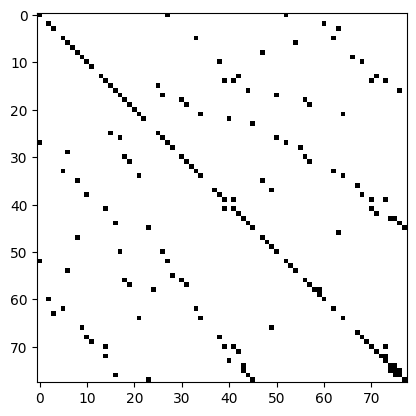

In [16]:
util.evaluate_output(output_prob_matrix, param, within_session, session_switch, match_threshold = 0.75)
match_threshold = param['match_threshold']
OutputThreshold = np.zeros_like(output_prob_matrix)
OutputThreshold[output_prob_matrix > match_threshold] = 1
plt.imshow(OutputThreshold, cmap = 'Greys')

In [17]:
amplitude = extracted_wave_properties['amplitude']
spatial_decay = extracted_wave_properties['spatial_decay']
avg_centroid = extracted_wave_properties['avg_centroid']
avg_waveform = extracted_wave_properties['avg_waveform']
avg_waveform_per_tp = extracted_wave_properties['avg_waveform_per_tp']
wave_idx = extracted_wave_properties['good_wave_idxs']
max_site = extracted_wave_properties['max_site']
max_site_mean = extracted_wave_properties['max_site_mean']
gui.process_info_for_GUI(output_prob_matrix, match_threshold, scores_to_include, total_score, amplitude, spatial_decay,
                         avg_centroid, avg_waveform, avg_waveform_per_tp, wave_idx, max_site, max_site_mean, 
                         waveform, within_session, channel_pos, clus_info, param)

In [20]:
matches = np.argwhere(match_threshold == 0.99)
UIDs = aid.assign_unique_id(output_prob_matrix, param, clus_info)

SaveDir = rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults'
su.save_to_output(SaveDir, scores_to_include, matches, output_prob_matrix, avg_centroid, avg_waveform, avg_waveform_per_tp, max_site,
                   total_score, OutputThreshold,  clus_info, param, UIDs=None,matches_curated = True, save_match_table = True,)

Number of Liberal Matches: 43
Number of Intermediate Matches: 40
Number of Conservative Matches: 39


In [ ]:
import pandas as pd
ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'

df = pd.read_csv(rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults\MatchTable.csv')

In [ ]:
df1 = df[df['Matches']==1]
df2=df1[df1['RecSes 2']==1]
df2

,ID1,ID2,RecSes 1,RecSes 2,Matches,UM Probabilities,TotalScore,amp_score,spatial_decay_score,centroid_overlord_score,...,waveform_score,trajectory_score,UID1,UID2,UID Liberal 1,UID Liberal 2,UID int 1,UM UID int 2,UID Conservative 1,UID Conservative 2
8,8,0,1,1,1,0.559306,0.647287,0.608143,0.477241,0.786212,...,0.524703,0.705955,8,0,8,0,8,0,8,0
9,9,0,1,1,1,0.593231,0.572245,0.759985,0.668933,0.780498,...,0.716107,0.808139,9,0,9,0,9,0,9,0
13,13,0,1,1,1,0.559860,0.572686,0.524698,0.612198,0.838065,...,0.942391,0.818306,13,0,9,0,13,0,13,0
22,0,0,2,1,1,0.709685,0.658443,0.769625,0.625613,0.668425,...,0.472092,0.637037,22,0,8,0,8,0,8,0
41,19,0,2,1,1,0.913726,0.699042,0.353980,0.632082,0.662658,...,0.877444,0.795453,41,0,0,0,41,0,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,17,17,1,1,1,0.933529,0.746816,0.513099,0.734521,0.870367,...,0.741050,0.692176,17,17,17,17,17,17,17,17
1173,17,18,2,1,1,0.715759,0.680894,0.637730,0.582328,0.852550,...,0.530898,0.629360,39,18,39,18,39,18,39,18
1216,19,19,1,1,1,0.987612,0.848461,0.833453,0.640790,0.904606,...,0.831356,0.803380,19,19,19,19,19,19,19,19
1280,20,20,1,1,1,0.942852,0.777733,0.512300,0.538741,0.965920,...,0.882581,0.767136,20,20,20,20,20,20,20,20


: 

In [ ]:
xx, yy = np.meshgrid(original_ids, original_ids)
unit_a_list = xx.reshape(n_units*n_units)
unit_b_list = yy.reshape(n_units*n_units)


In [ ]:
np.meshgrid(original_ids, original_ids)

[array([['0', 'mua', '1', ..., 'mua', '19', 'mua'],
        ['0', 'mua', '1', ..., 'mua', '19', 'mua'],
        ['0', 'mua', '1', ..., 'mua', '19', 'mua'],
        ...,
        ['0', 'mua', '1', ..., 'mua', '19', 'mua'],
        ['0', 'mua', '1', ..., 'mua', '19', 'mua'],
        ['0', 'mua', '1', ..., 'mua', '19', 'mua']], dtype='<U50'),
 array([['0', '0', '0', ..., '0', '0', '0'],
        ['mua', 'mua', 'mua', ..., 'mua', 'mua', 'mua'],
        ['1', '1', '1', ..., '1', '1', '1'],
        ...,
        ['mua', 'mua', 'mua', ..., 'mua', 'mua', 'mua'],
        ['19', '19', '19', ..., '19', '19', '19'],
        ['mua', 'mua', 'mua', ..., 'mua', 'mua', 'mua']], dtype='<U50')]

In [ ]:
import pandas as pd
ephys_path = 'S:\Sachuriga\Ephys_Recording\CR_CA1'

df = pd.read_csv(rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults\MatchTable.csv')

In [ ]:
df1 = df[df['Matches']==1]
df2=df1[df1['RecSes 2']==1]
df

,ID1,ID2,RecSes 1,RecSes 2,Matches,UM Probabilities,TotalScore,AmpScore,SpatialDecayScore,CentroidOverlord,CentroidDist,WaveformScore,TrajectoryScore
0,6,6,1,1,1,0.999981,0.896175,0.601483,0.762703,0.976545,0.980322,0.979726,0.874412
1,7,6,1,1,0,0.002614,0.681720,0.753830,0.520181,0.843550,0.851751,0.693527,0.526268
2,9,6,1,1,0,0.000090,0.397127,0.760701,0.570237,0.836600,0.000000,0.322726,0.390256
3,10,6,1,1,0,0.000107,0.333470,0.562141,0.533055,0.745555,0.000000,0.458230,0.288840
4,11,6,1,1,0,0.000012,0.315856,0.604460,0.354040,0.838837,0.000000,0.341712,0.367779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,4,9,3,3,0,0.000004,0.199958,0.156988,0.139472,0.532109,0.000000,0.809808,0.335541
621,5,9,3,3,0,0.000002,0.159651,0.199129,0.019742,0.682884,0.000000,0.382431,0.504397
622,6,9,3,3,0,0.000002,0.106621,0.023560,0.034076,0.725807,0.000000,0.302507,0.458798
623,7,9,3,3,0,0.000017,0.204853,0.364767,0.023311,0.183797,0.657460,0.286014,0.481078


In [ ]:
rf'{ephys_path}\{animal}\{animal}_{day}_unitmatchResults\MatchTable.csv'

'S:\\Sachuriga\\Ephys_Recording\\CR_CA1\\65588\\65588_2024-03-12_unitmatchResults\\MatchTable.csv'